In [1]:
import numpy as np
import pandas

from graphing.sampling_graphs import create_sample_distribution_graph_groupings, create_grouping_influence_graph, create_sample_distribution_graph
from learning.grouped_learning import Berta
from learning.grouped_linear_regression import Gustav
from model.datasets import Datasets, SynDataset
from model.synth_data_factory import SyntheticDataBuilder
from sampling.from_tests_sampler import FromTestsSamplingStrategy
from sampling.group_sampling.hamming_group_sampling_strategy import HammingGroupSamplingStrategy
from sampling.random_sampling.better_random_sampling_strategy import BetterRandomSamplingStrategy
from sampling.sampler import Sampler
from testing.grouped_tester import GroupedTester
from testing.grouped_tester_flipping import GroupedTesterSigns
from testing.tester import Tester
from util.util import get_samples_with_results, get_regression_metricts, make_df_representation
from util.util import get_samples_with_results_full
import logging

pandas.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
FORMAT = "[%(filename)s:%(lineno)s - %(funcName)20s() ] %(message)s"
logging.basicConfig(format=FORMAT)


In [2]:
data_builder = SyntheticDataBuilder(
    parameters=15,
    influential_parameters=1,
    mutex_groups=[4]*0,
    mutex_required=[True]*0,
    constrains=0,
    interactions=0
)
data_builder.print_overview()
influential_params = [i - 1 for i in data_builder.influential_features]
vm, test_strategy = data_builder.get_vm(), data_builder.get_testing_strategy()
vm, test_strategy = Datasets().get_dataset('berkley')


Synthetic data generation:
 Generated 15 Parameters
 0 mutex groups
 0 Constrains
 Influential features: [11]
 Weightings: [4, -4, 0, 3, 2, 2, 1, 5, -3, 0, 125, -4, -4, -4, -2]
 Interacting features:


In [3]:
sampler = Sampler(BetterRandomSamplingStrategy(vm))
sampler_test = Sampler(BetterRandomSamplingStrategy(vm))
tester = Tester(test_strategy)
x_test, y_test, samples_test = get_samples_with_results_full(sampler_test, tester, 10)
# create_sample_distribution_graph(samples_test, vm)

[hamming_group_sampling_strategy.py:81 -           get_sample() ] Get sample with groups size 2
[hamming_group_sampling_strategy.py:88 -           get_sample() ] Searching for group 0
[hamming_group_sampling_strategy.py:98 -           get_sample() ]  Group generation 0.0072498321533203125s
[hamming_group_sampling_strategy.py:88 -           get_sample() ] Searching for group 1
[hamming_group_sampling_strategy.py:98 -           get_sample() ]  Group generation 0.012679100036621094s
[hamming_group_sampling_strategy.py:111 -           get_sample() ] Grouping generation: 0.03758120536804199s
[hamming_group_sampling_strategy.py:81 -           get_sample() ] Get sample with groups size 2
[hamming_group_sampling_strategy.py:88 -           get_sample() ] Searching for group 0
[hamming_group_sampling_strategy.py:98 -           get_sample() ]  Group generation 0.00891566276550293s
[hamming_group_sampling_strategy.py:88 -           get_sample() ] Searching for group 1
[hamming_group_sampling_strat

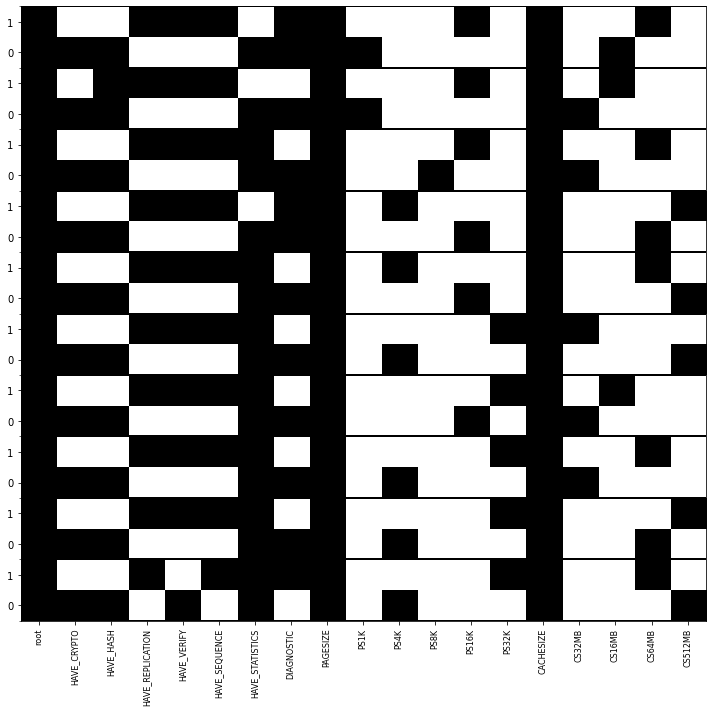

In [4]:
group_size = 2
strategy = HammingGroupSamplingStrategy(vm, group_size=group_size)
grouped_sampler = Sampler(strategy)
grouped_tester = GroupedTester(test_strategy)
grouped_sampler.reset()
x, y, samples = get_samples_with_results_full(grouped_sampler, grouped_tester, 10)
#display((make_df_representation(x, y)))
create_sample_distribution_graph_groupings(samples, vm, [])

In [5]:
df = make_df_representation(x, y)
df = df[df.index % group_size == 0]
from scipy.spatial.distance import pdist, squareform

distances = pdist(df.values, metric='hamming')
dist_matrix = squareform(distances)
display(pandas.DataFrame(dist_matrix))

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.25,0.25,0.35,0.15,0.25,0.35,0.35,0.35,0.35
1,0.25,0.00,0.15,0.25,0.15,0.25,0.15,0.25,0.25,0.25
2,0.25,0.15,0.00,0.15,0.15,0.25,0.25,0.15,0.15,0.25
3,0.35,0.25,0.15,0.00,0.25,0.15,0.10,0.15,0.15,0.25
4,0.15,0.15,0.15,0.25,0.00,0.15,0.25,0.25,0.25,0.25
5,0.25,0.25,0.25,0.15,0.15,0.00,0.15,0.25,0.25,0.25
6,0.35,0.15,0.25,0.10,0.25,0.15,0.00,0.25,0.25,0.25
7,0.35,0.25,0.15,0.15,0.25,0.25,0.25,0.00,0.15,0.25
8,0.35,0.25,0.15,0.15,0.25,0.25,0.25,0.15,0.00,0.10
9,0.35,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.10,0.00


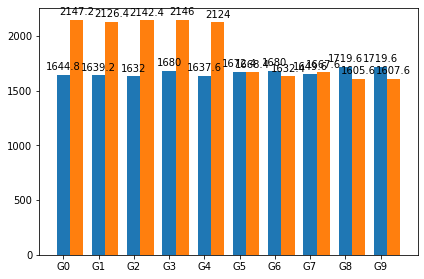

In [6]:
create_grouping_influence_graph(x, y, group_size)

[grouped_learning.py:92 -                  fit() ] Fitting data
[grouped_learning.py:95 -                  fit() ] Determining group sensitivity took 0.09258818626403809.
[grouped_learning.py:71 - perform_stepwise_analysis() ] 1th influential parameter idx: 13 with 363.7313705684293
[grouped_learning.py:71 - perform_stepwise_analysis() ] 2th influential parameter idx: 10 with -131.06862943157066
[grouped_learning.py:71 - perform_stepwise_analysis() ] 3th influential parameter idx: 11 with -123.86862943157075
[grouped_learning.py:71 - perform_stepwise_analysis() ] 4th influential parameter idx: 12 with -121.26862943157069
[grouped_learning.py:71 - perform_stepwise_analysis() ] 5th influential parameter idx: 9 with -53.86862943157075
[grouped_learning.py:71 - perform_stepwise_analysis() ] 6th influential parameter idx: 16 with -12.600000000000017
[grouped_learning.py:71 - perform_stepwise_analysis() ] 7th influential parameter idx: 6 with 7.435294117647069
[grouped_learning.py:71 - perfo

,Test,Predicted
0,1616.8,1740.240285
1,1582.0,1666.644412
2,1621.2,1740.200796
3,1612.4,1663.040285
4,1589.6,1672.840285
5,1587.6,1661.289535
6,1614.4,1651.489535
7,1595.2,1672.800796
8,1582.0,1670.240285
9,2080.0,2157.840285


[81.54264973776363, 7272.987567565872, 0.6524598313234169, 0.04982656420165772]


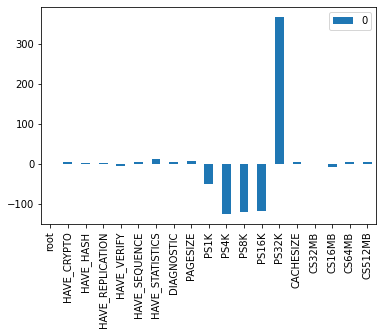

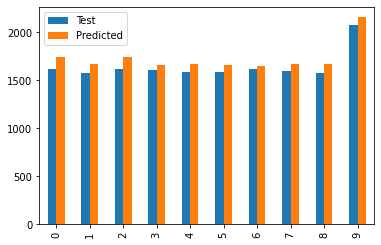

In [7]:
berta = Berta(vm, group_size)
logging.getLogger().setLevel(logging.DEBUG)
berta.fit(x, y)
co = pandas.DataFrame(berta.model.coef_)
ax = co.transpose().plot.bar()
ax.set_xticklabels(vm.get_features())
y_predicted = berta.predict(x_test)
metrics = get_regression_metricts(y_test, y_predicted)
comp = pandas.DataFrame()
comp['Test'] = y_test[:50]
comp['Predicted'] = y_predicted[:50]
comp.plot.bar()
display(comp)
print(metrics)